In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Correct path for uploaded file
df = pd.read_csv('/content/heart_stroke_analysis.data.csv')

# Display the first 5 rows
df.head()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.isnull().sum()


,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


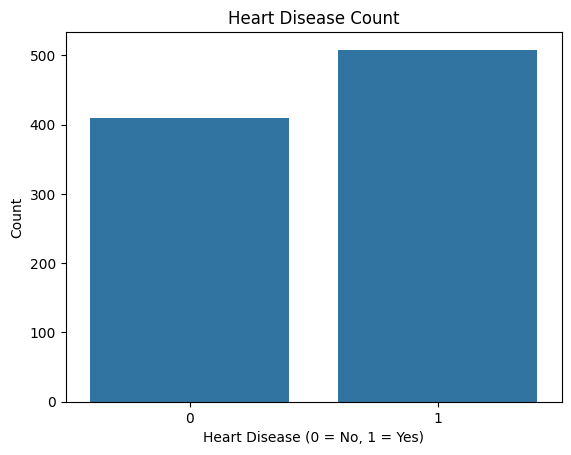

In [ ]:
sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Count')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


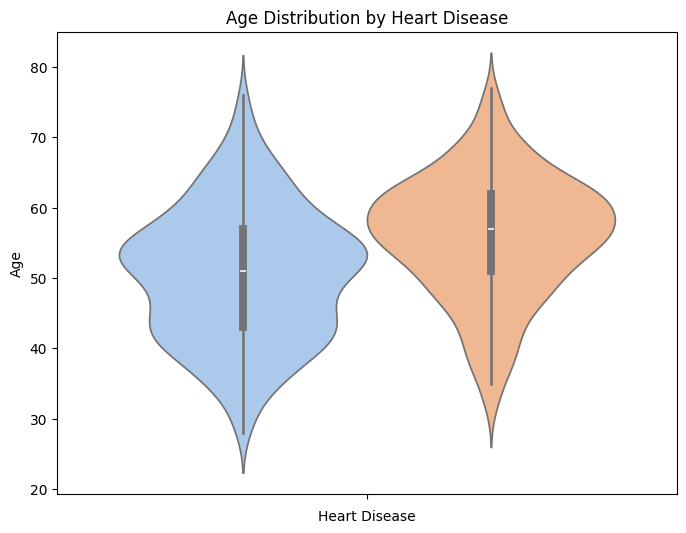

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(hue='HeartDisease',legend=False, y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()



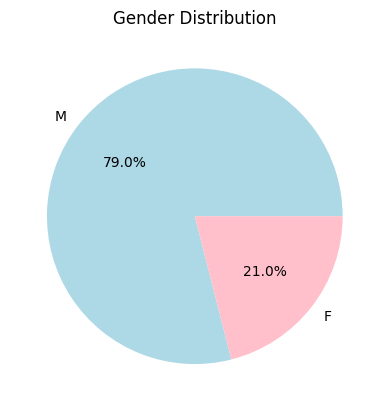

In [ ]:
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


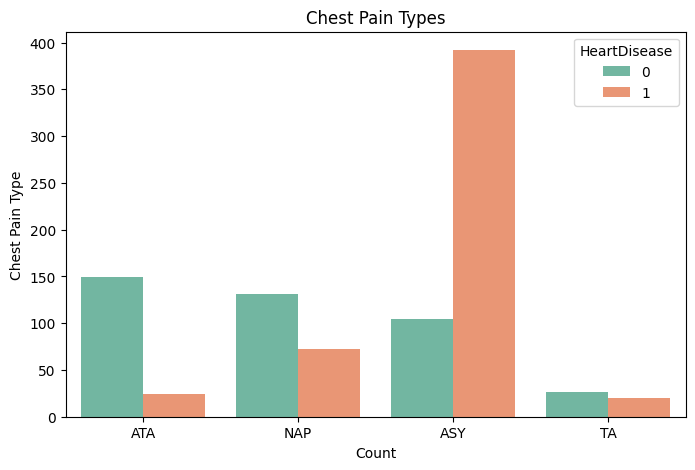

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='ChestPainType',hue='HeartDisease', data=df, palette='Set2')
plt.title('Chest Pain Types')
plt.xlabel('Count')
plt.ylabel('Chest Pain Type')
plt.show()


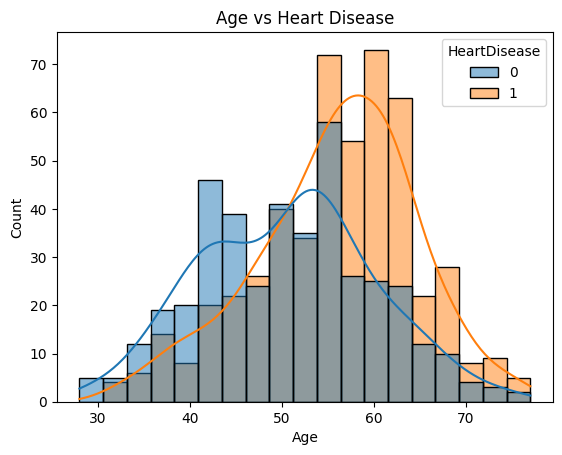

In [ ]:
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True)
plt.title('Age vs Heart Disease')
plt.show()


In [ ]:
sns.histplot(data=df, x='', hue='HeartDisease', kde=True)
plt.title('Age vs Heart Disease')
plt.show()


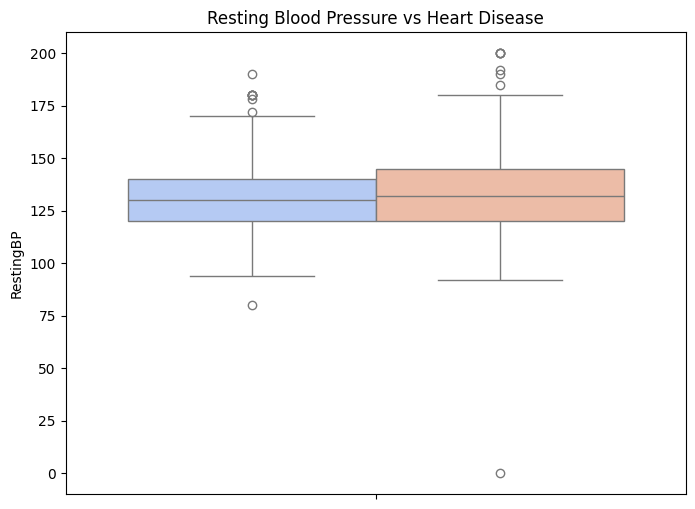

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(hue='HeartDisease',legend=False, y='RestingBP', data=df, palette='coolwarm')
plt.title('Resting Blood Pressure vs Heart Disease')
plt.show()


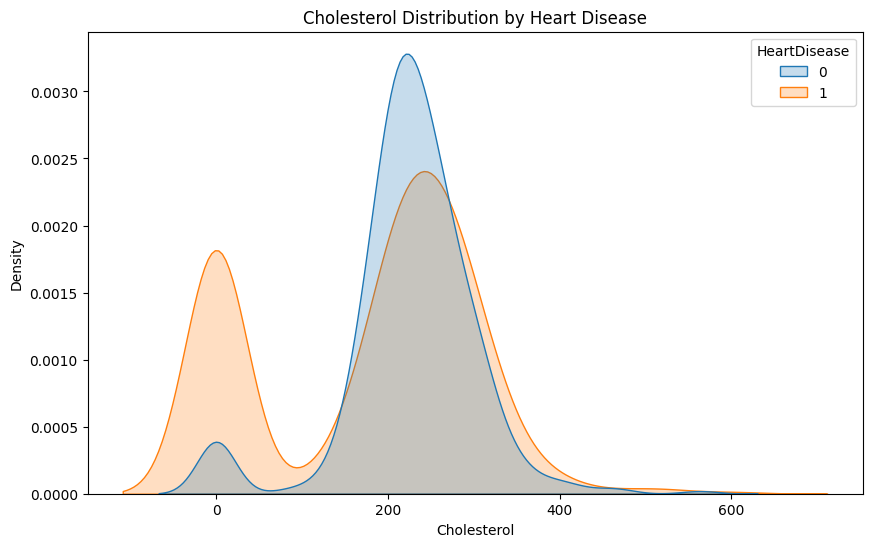

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Cholesterol', hue='HeartDisease', fill=True)
plt.title('Cholesterol Distribution by Heart Disease')
plt.show()


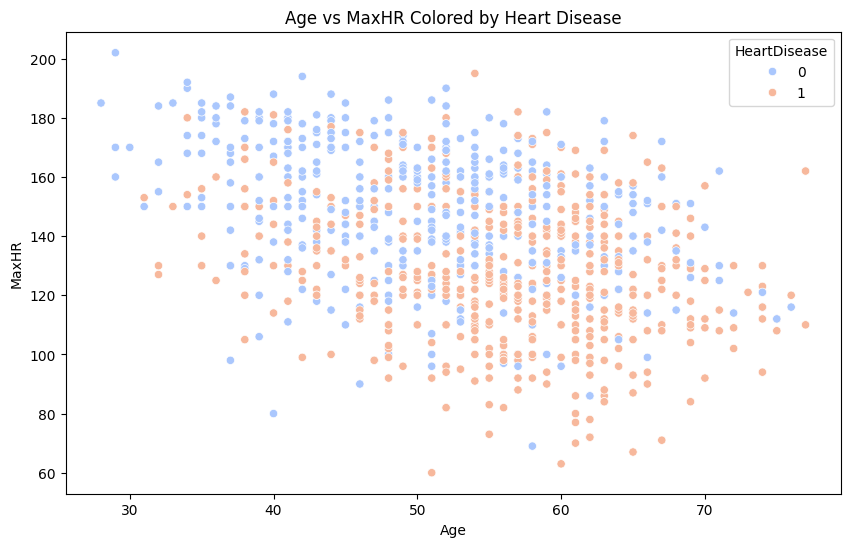

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=df, palette='coolwarm')
plt.title('Age vs MaxHR Colored by Heart Disease')
plt.show()


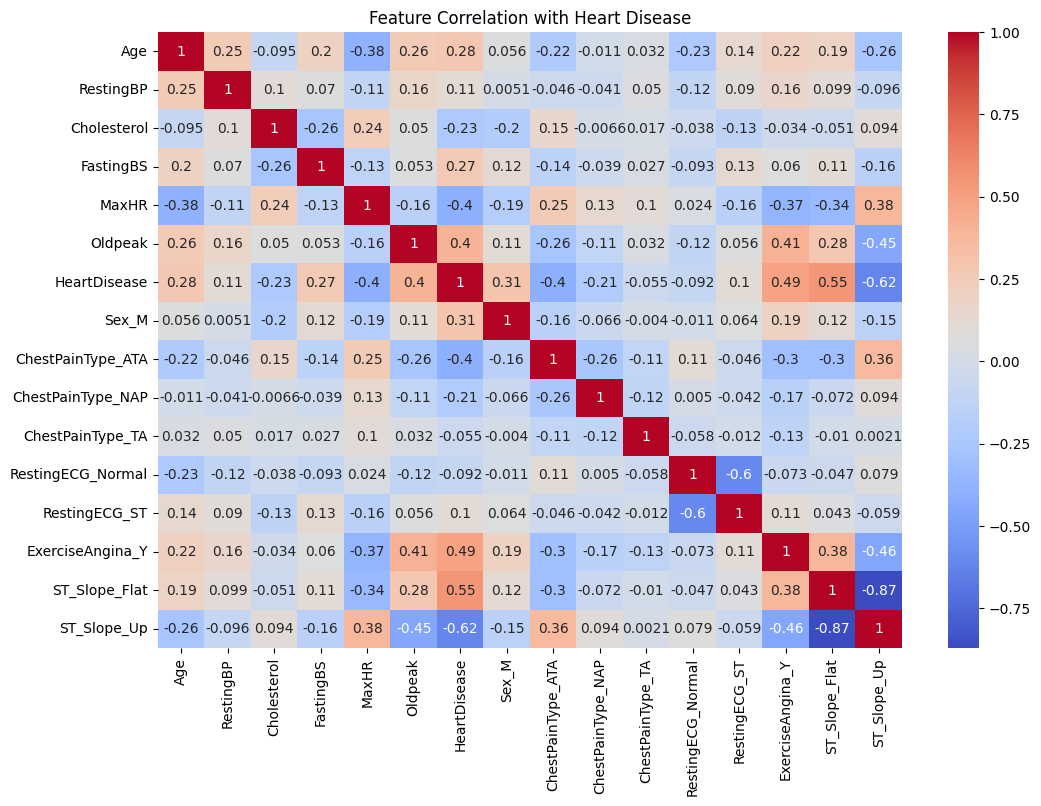

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert ALL categorical columns to numbers
df_encoded = pd.get_dummies(df, drop_first=True)

# Now plot the heatmap safely
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Heart Disease')
plt.show()



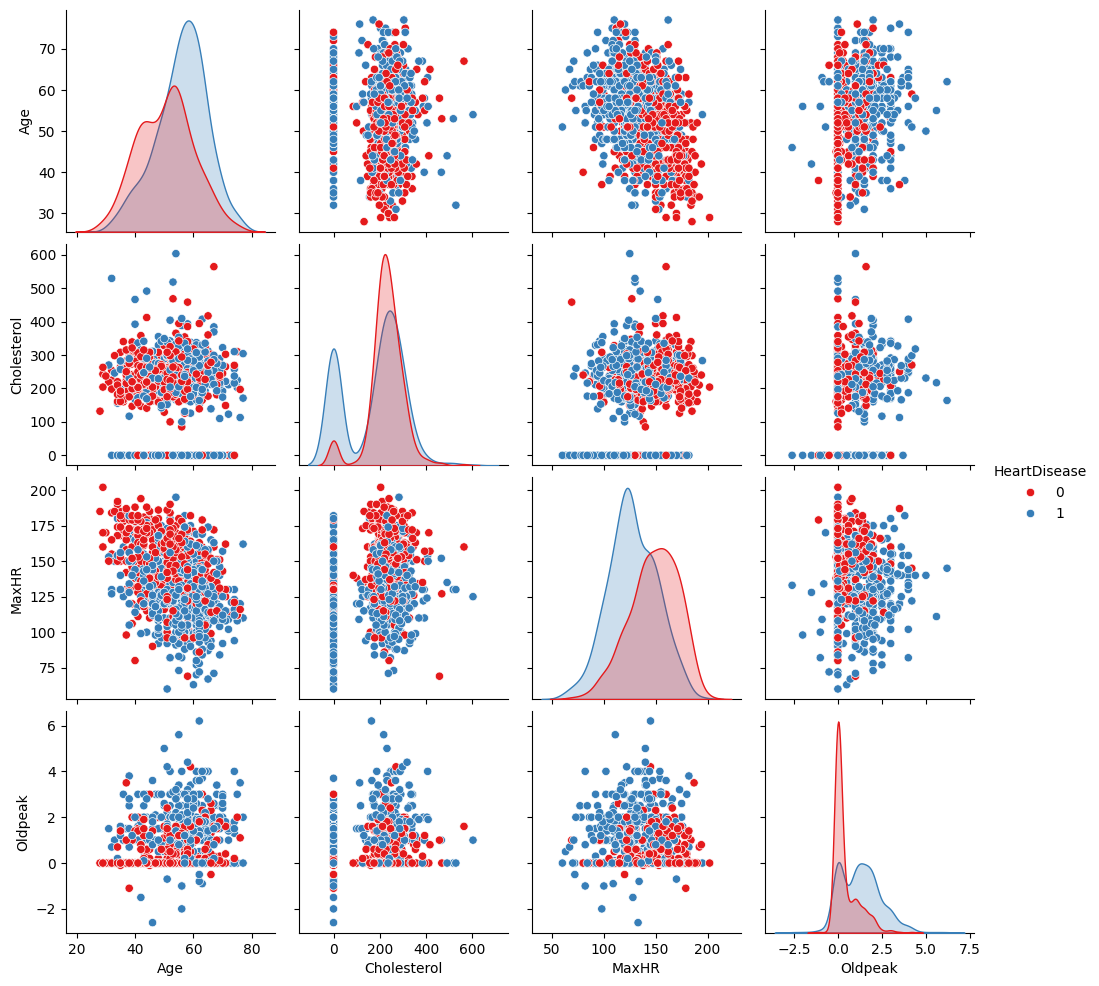

In [ ]:
sns.pairplot(df[['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']], hue='HeartDisease', palette='Set1')
plt.show()


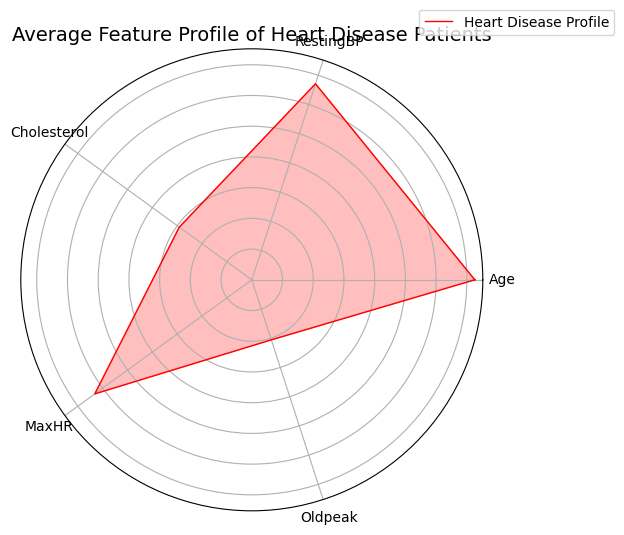

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select relevant columns
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_subset = df[features + ['HeartDisease']]

# Calculate average values for Heart Disease = 1 (positive cases)
heart_disease_profile = df_subset[df_subset['HeartDisease'] == 1][features].mean()

# Normalize the values between 0 and 1
max_values = df_subset[features].max()
normalized_profile = heart_disease_profile / max_values

# Radar chart setup
labels = features
values = normalized_profile.tolist()
values += values[:1]  # repeat the first value to close the loop

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='r', linewidth=1, label='Heart Disease Profile')
ax.fill(angles, values, color='r', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Average Feature Profile of Heart Disease Patients', size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


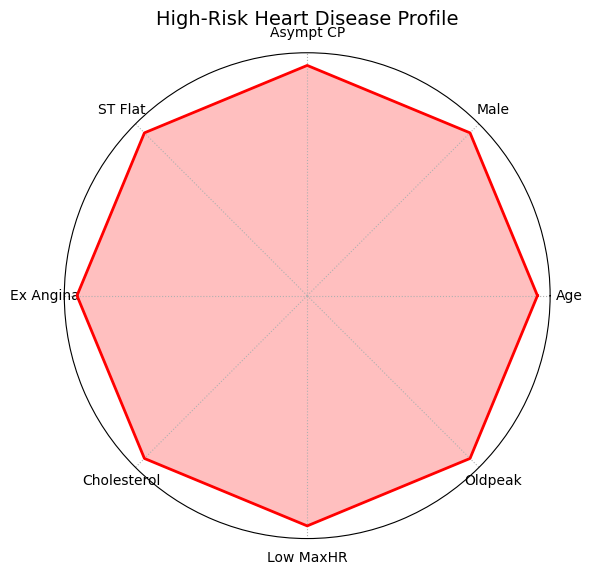

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Shortened labels for readability
labels = ['Age', 'Male', 'Asympt CP', 'ST Flat', 'Ex Angina', 'Cholesterol', 'Low MaxHR', 'Oldpeak']
values = [1, 1, 1, 1, 1, 1, 1, 1]  # All high-risk features marked

# Prepare the radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values += values[:1]  # close the shape
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='red', linewidth=2)
ax.fill(angles, values, color='red', alpha=0.25)

# Clean up the axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticks([])  # remove radial tick labels
ax.grid(True, linestyle='dotted')

plt.title('High-Risk Heart Disease Profile', size=14, pad=20)
plt.tight_layout()
plt.show()


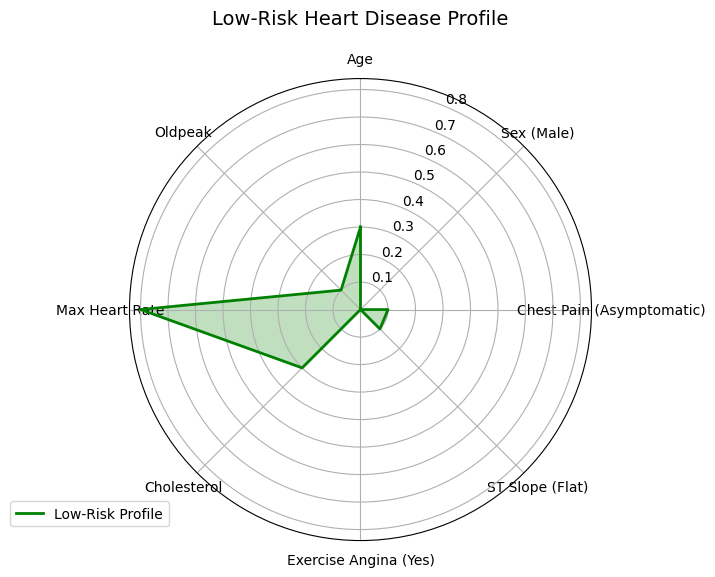

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define low-risk profile values (example values scaled between 0 and 1)
labels = ['Age', 'Sex (Male)', 'Chest Pain (Asymptomatic)', 'ST Slope (Flat)',
          'Exercise Angina (Yes)', 'Cholesterol', 'Max Heart Rate', 'Oldpeak']
low_risk_values = [0.3, 0.0, 0.1, 0.1, 0.0, 0.3, 0.8, 0.1]  # Lower risk indicators

# Radar chart setup
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
low_risk_values += low_risk_values[:1]  # complete the loop
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.plot(angles, low_risk_values, color='green', linewidth=2, label='Low-Risk Profile')
ax.fill(angles, low_risk_values, color='green', alpha=0.25)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title('Low-Risk Heart Disease Profile', fontsize=14, y=1.1)
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
